In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import random
random.seed(9179)

In [2]:
df = pd.read_csv("/content/GS.csv")
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     1999-05-04   76.000000   77.250000   70.000000   70.375000   54.176796   
1     1999-05-05   69.875000   69.875000   66.250000   69.125000   53.214500   
2     1999-05-06   68.000000   69.375000   67.062500   67.937500   52.300339   
3     1999-05-07   67.937500   74.875000   66.750000   74.125000   57.063652   
4     1999-05-10   73.375000   73.500000   70.250000   70.687500   54.417358   
...          ...         ...         ...         ...         ...         ...   
5631  2021-09-17  396.320007  399.160004  388.829987  391.459991  391.459991   
5632  2021-09-20  377.820007  380.859985  372.500000  378.130005  378.130005   
5633  2021-09-21  380.850006  381.500000  374.079987  375.839996  375.839996   
5634  2021-09-22  380.799988  389.290009  379.709991  385.470001  385.470001   
5635  2021-09-23  390.390015  393.739990  388.179993  391.859985  391.859985   

        Volume  
0     22320900  
1    

In [3]:
data = df.filter(['Close'])
dataset = data.values
training_data_length = math.ceil(len(dataset)*0.8)

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
train_data = scaled_data[0:training_data_length, :]
x_train = [] # Independent variables
y_train = [] # target variable (dependent)
for i in range(180, len(train_data)):
  x_train.append(train_data[i-180:i,0])
  y_train.append(train_data[i,0])
  if i<= 180:
    print(x_train)
    print(y_train)
    print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

[array([0.04997416, 0.04657456, 0.04334494, 0.06017297, 0.05082406,
       0.05065408, 0.05847317, 0.05762327, 0.04946422, 0.04521472,
       0.04521472, 0.0470845 , 0.0445348 , 0.04215508, 0.03620577,
       0.03399603, 0.03824553, 0.042835  , 0.04334494, 0.03314613,
       0.03059643, 0.03161631, 0.03637575, 0.03790557, 0.03195627,
       0.03671571, 0.03093639, 0.03059643, 0.02515706, 0.02923659,
       0.03603579, 0.03535587, 0.03484593, 0.04759444, 0.04351492,
       0.03535587, 0.03552585, 0.03875547, 0.03960537, 0.042835  ,
       0.05507357, 0.05116402, 0.05150398, 0.05031412, 0.04351492,
       0.04147516, 0.04147516, 0.0445348 , 0.04317496, 0.04249504,
       0.04334494, 0.0436849 , 0.04742446, 0.04385488, 0.04317496,
       0.03943539, 0.03280617, 0.03059643, 0.03671571, 0.03824553,
       0.03535587, 0.03348609, 0.02940657, 0.0239672 , 0.02175746,
       0.0197177 , 0.01155865, 0.01036879, 0.01359841, 0.02583698,
       0.02362724, 0.03025647, 0.02957655, 0.02991651, 0.0280

(4329, 180, 1)

In [5]:
model = Sequential()
model.add(LSTM(50,  return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4329/4329 [==============================] - 328s 75ms/step - loss: 4.7986e-04


In [8]:
test_data = scaled_data[training_data_length - 180:,:]
x_test = []
y_test =dataset[training_data_length:,:]
for i in range(180, len(test_data)):
  x_test.append(test_data[i-180:i,0])
x_test = np.array(x_test)
x_test.shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [9]:
predictions = model.predict(x_test)

36/36 [==============================] - 2s 39ms/step


In [10]:
predictions = scaler.inverse_transform(predictions)

8.912545248564184


<ipython-input-11-127c59b50d20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


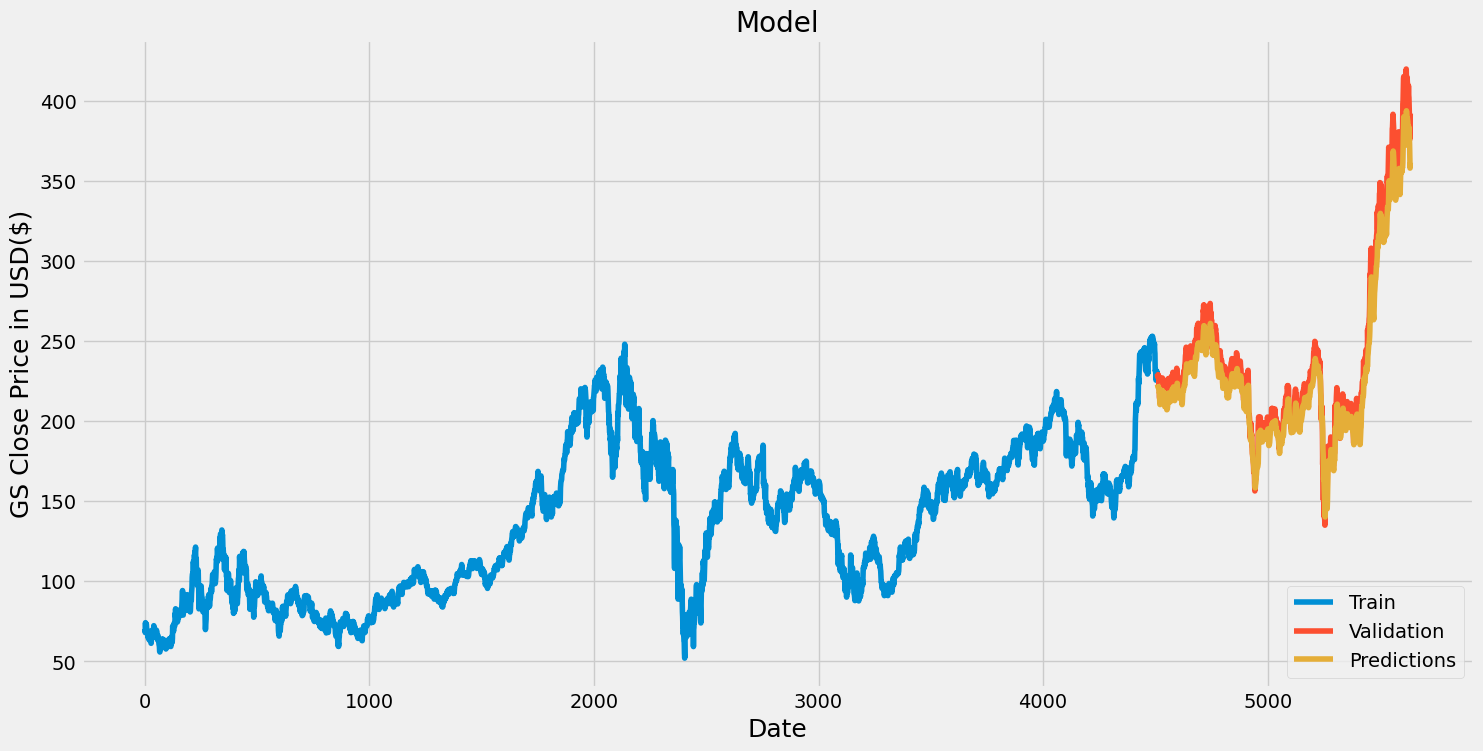

In [11]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8),)
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('GS Close Price in USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()

In [12]:
print(valid)
model.summary()

           Close  Predictions
4509  229.259995   222.957123
4510  227.660004   222.485001
4511  228.639999   221.466370
4512  227.880005   221.186569
4513  228.889999   220.827576
...          ...          ...
5631  391.459991   377.184235
5632  378.130005   372.486450
5633  375.839996   363.470276
5634  385.470001   357.841980
5635  391.859985   361.136719

[1127 rows x 2 columns]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 180, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
 